In [ ]:
!pip install wandb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.1 MB/s 
     |████████████████████████████████| 166 kB 50.9 MB/s 
     |████████████████████████████████| 182 kB 54.2 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 166 kB 48.1 MB/s 
     |████████████████████████████████| 162 kB 50.4 MB/s 
     |████████████████████████████████| 162 kB 49.4 MB/s 
     |████████████████████████████████| 158 kB 37.9 MB/s 
     |████████████████████████████████| 157 kB 48.9 MB/s 
     |████████████████████████████████| 157 kB 13.3 MB/s 
     |████████████████████████████████| 157 kB 60.5 MB/s 
     |████████████████████████████████| 157 kB 44.7 MB/s 
     |████████████████████████████████| 157 kB 53.0 MB/s 
     |████████████████████████████████| 157 kB 46.0 MB/s 
     |████████████████████████████████| 157 kB 27.1 MB/s 
     |████████████████████████████

In [ ]:
import wandb
from wandb.keras import WandbCallback
wandb.login()
wandb.init(project="my-test-project")

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#write a convolutional neural network from unicornrecorder.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#import wandb
#from wandb.keras import WandbCallback

#wandb.init(project="my-test-project")


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
3996
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
tf.Tensor([3996 1024    8], shape=(3,), dtype=int32)
<class 'numpy.ndarray'>
tf.Tensor(
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]], shape=(3196, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
Epoch 1/5
100/100 [==============================] - 117s 1s/step - loss: 1.0113 - accuracy: 0.5735 - val_loss: 0.9533 - val_accuracy: 0.5962
Epoch 2/5
100/100 [==============================] - 114s 1s/step - loss: 0.9323 - accuracy: 0.6058 - val_loss: 0.9244 - val_accuracy: 0.6000
Epoch 3/5
100/100 [==============================] - 106s 1s/step - loss: 0.8207 - accuracy: 0.6333 - val_loss: 0.8729 - val_accuracy: 0.6413
Epoch 4/5
100/100 [==============================] - 104s 1s/step - loss: 0.6292 - accuracy: 0.7412 - val_loss: 0.8111 - val_accuracy: 0.7125
Epoch 5/5
100/100 

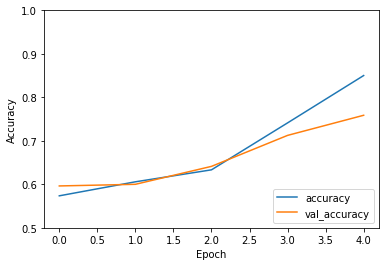

In [ ]:
#read in the data
neural_data = pd.read_csv('/content/drive/MyDrive/re-emote/finaldataset_withindex.csv',usecols=range(1,9))
#print(neural_data.shape)
#display(neural_data)
labels=df = open('/content/drive/MyDrive/re-emote/dataset/LabelList.txt', 'r')
scaler = StandardScaler()

labels=labels.read()
#print(labels)
list_labels=[]
for i in labels:
  try:
    int(i)
    list_labels.append(int(i))
  except:
    pass
labels=list_labels
labels=tf.keras.utils.to_categorical(np.array(labels)-1, num_classes = 3)
print(labels)
#print(labels[0],'lablesssrwg')
#print(type(labels))
print(len(labels))
print(labels)

neural_data = scaler.fit_transform(neural_data)
#print(type(neural_data))
neural_images=tf.reshape(neural_data, [-1,1024,8])
print(tf.shape(neural_images))



#split the data into training and testing
aa=list(neural_images)
train_images, test_images,train_labels, test_labels = train_test_split(aa,labels, test_size=0.2,shuffle=True,random_state = 42)
#print(tf.convert_to_tensor(train_images).shape)
print(type(train_labels))


train_labels=tf.convert_to_tensor(train_labels)
print(train_labels)
#print(train_labels,'train labels')
#print(tf.shape(train_labels))


test_labels=tf.convert_to_tensor(test_labels)
#print(test_labels,'train label')
#print(tf.shape(test_labels))

train_features = tf.convert_to_tensor(train_images)
print(type(train_features))
test_features = tf.convert_to_tensor(test_images)
#print(tf.shape(train_features),'fjkerogfnjjekognvdf')



#build the convolutional model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(12, 1), activation='relu', input_shape=(1024, 8,1),padding="same"),
    layers.AveragePooling2D(pool_size=(4, 1), strides=(4, 1), padding="same"),
    layers.Conv2D(64, kernel_size=(12, 1), activation='relu',padding='same'),
    layers.AveragePooling2D(pool_size=(2, 1), strides=(2, 1),padding="same"),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(700, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(400, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')

])


#compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

#train the model
history = model.fit(
    train_features, train_labels,
    validation_data=(test_features, test_labels),
    epochs=5,
    shuffle=True
)

#plot the results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.show()

In [ ]:
print(train_features.shape)
print(test_features.shape)


In [ ]:
model.save("model.h5")
print("Saved model to disk")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

In [ ]:
model.summary()

In [ ]:
for i in range(10):
    model.layers[i].trainable = False

In [ ]:
(model.layers[12])

In [ ]:
ll = model.layers[14].output
ll = layers.Dense(64)(ll)
ll = layers.Dropout(0.3)(ll)
ll = layers.Dense(32)(ll)
ll = layers.Dense(3,activation="softmax")(ll)

new_model = tf.keras.Model(inputs=model.input,outputs=ll)

In [ ]:
neural_data = pd.read_csv('/content/drive/MyDrive/re-emote/dataregister.csv',usecols=range(1,9))
display(neural_data)
#print(neural_data.shape)
#display(neural_data)
labels=df = open('/content/drive/MyDrive/re-emote/312 (1).txt', 'r')
scaler = StandardScaler()

labels=labels.read()
#print(labels)
list_labels=[]
for i in labels:
  try:
    int(i)
    list_labels.append(int(i))
  except:
    pass
labels=list_labels
labels=tf.keras.utils.to_categorical(np.array(labels)-1, num_classes = 3)
print(labels)
#print(labels[0],'lablesssrwg')
#print(type(labels))
#print(len(labels))

neural_data = scaler.fit_transform(neural_data)
#print(type(neural_data))
neural_images=tf.reshape(neural_data, [-1,1024,8])
print(tf.shape(neural_images))



#split the data into training and testing
aa=list(neural_images)
train_images, test_images,train_labels, test_labels = train_test_split(aa,labels, test_size=0.2,shuffle=True,random_state=42)
#print(tf.convert_to_tensor(train_images).shape)
print(type(train_labels))


train_labels=tf.convert_to_tensor(train_labels)
#print(train_labels,'train labels')
#print(tf.shape(train_labels))


test_labels=tf.convert_to_tensor(test_labels)
#print(test_labels,'train label')
#print(tf.shape(test_labels))

train_features = tf.convert_to_tensor(train_images)
print(type(train_features))
test_features = tf.convert_to_tensor(test_images)

In [ ]:
#compile the model
new_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

history = new_model.fit(
    train_features, train_labels,
    validation_data=(test_features, test_labels),
    epochs=13,
    shuffle=True
)
#plot the results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

plt.show()